In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('D:/Data Analysis/fetal_health.csv')
pd.set_option('display.max_columns',None)
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [134]:
df.shape

(2126, 22)

In [135]:
df.size

46772

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [137]:
for features in df.columns:
    print("{} has {} unique no's".format(features,df[features].nunique()))

baseline value has 48 unique no's
accelerations has 20 unique no's
fetal_movement has 102 unique no's
uterine_contractions has 16 unique no's
light_decelerations has 16 unique no's
severe_decelerations has 2 unique no's
prolongued_decelerations has 6 unique no's
abnormal_short_term_variability has 75 unique no's
mean_value_of_short_term_variability has 57 unique no's
percentage_of_time_with_abnormal_long_term_variability has 87 unique no's
mean_value_of_long_term_variability has 249 unique no's
histogram_width has 154 unique no's
histogram_min has 109 unique no's
histogram_max has 86 unique no's
histogram_number_of_peaks has 18 unique no's
histogram_number_of_zeroes has 9 unique no's
histogram_mode has 88 unique no's
histogram_mean has 103 unique no's
histogram_median has 95 unique no's
histogram_variance has 133 unique no's
histogram_tendency has 3 unique no's
fetal_health has 3 unique no's


In [138]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [139]:
df.drop_duplicates(keep='first',inplace=True)
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [140]:
df.corr()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.081885,-0.033949,-0.149587,-0.159836,-0.053706,-0.105003,0.303502,-0.278344,0.283918,-0.028901,-0.147150,0.360129,0.273402,-0.113242,-0.004807,0.708074,0.722152,0.788487,-0.134458,0.294412,0.146077
accelerations,-0.081885,1.000000,0.048114,0.086174,-0.110595,-0.043237,-0.128682,-0.280495,0.206762,-0.373507,-0.141413,0.298350,-0.155306,0.392684,0.189209,-0.007360,0.243083,0.270266,0.272507,0.124433,0.030670,-0.363947
fetal_movement,-0.033949,0.048114,1.000000,-0.069867,0.048795,-0.011022,0.265802,-0.104876,0.121532,-0.074900,0.011749,0.162803,-0.154297,0.099703,0.164645,-0.018122,-0.061496,-0.089938,-0.072676,0.179115,-0.001459,0.088057
uterine_contractions,-0.149587,0.086174,-0.069867,1.000000,0.282325,0.006416,0.075533,-0.234868,0.289004,-0.306057,-0.061488,0.141496,-0.115445,0.117391,0.080074,0.054975,-0.107352,-0.189689,-0.143001,0.236030,-0.069177,-0.205117
light_decelerations,-0.159836,-0.110595,0.048795,0.282325,1.000000,0.107483,0.224888,-0.119912,0.562265,-0.271542,-0.241392,0.520556,-0.555570,0.216314,0.397093,0.233940,-0.348386,-0.528620,-0.389898,0.563352,0.001977,0.059651
severe_decelerations,-0.053706,-0.043237,-0.011022,0.006416,0.107483,1.000000,0.012303,0.034071,0.034046,-0.030804,-0.037537,0.044826,-0.072162,-0.021438,0.006866,0.043308,-0.215559,-0.158950,-0.160805,0.136356,-0.070501,0.132408
prolongued_decelerations,-0.105003,-0.128682,0.265802,0.075533,0.224888,0.012303,1.000000,0.046360,0.266867,-0.137477,-0.226067,0.265293,-0.277521,0.119492,0.222605,0.055714,-0.437339,-0.489557,-0.445847,0.502976,-0.215226,0.486752
abnormal_short_term_variability,0.303502,-0.280495,-0.104876,-0.234868,-0.119912,0.034071,0.046360,1.000000,-0.428973,0.456708,-0.314061,-0.263059,0.278249,-0.113436,-0.169837,-0.150083,0.055694,0.072018,0.117442,-0.147080,-0.010233,0.469671
mean_value_of_short_term_variability,-0.278344,0.206762,0.121532,0.289004,0.562265,0.034046,0.266867,-0.428973,1.000000,-0.469191,0.073986,0.662788,-0.625601,0.410118,0.502948,0.265669,-0.306681,-0.444696,-0.335175,0.555874,-0.062618,-0.101089
percentage_of_time_with_abnormal_long_term_variability,0.283918,-0.373507,-0.074900,-0.306057,-0.271542,-0.030804,-0.137477,0.456708,-0.469191,1.000000,-0.170590,-0.455015,0.427104,-0.285477,-0.279871,-0.121341,0.163879,0.221090,0.185019,-0.281714,0.037646,0.421634


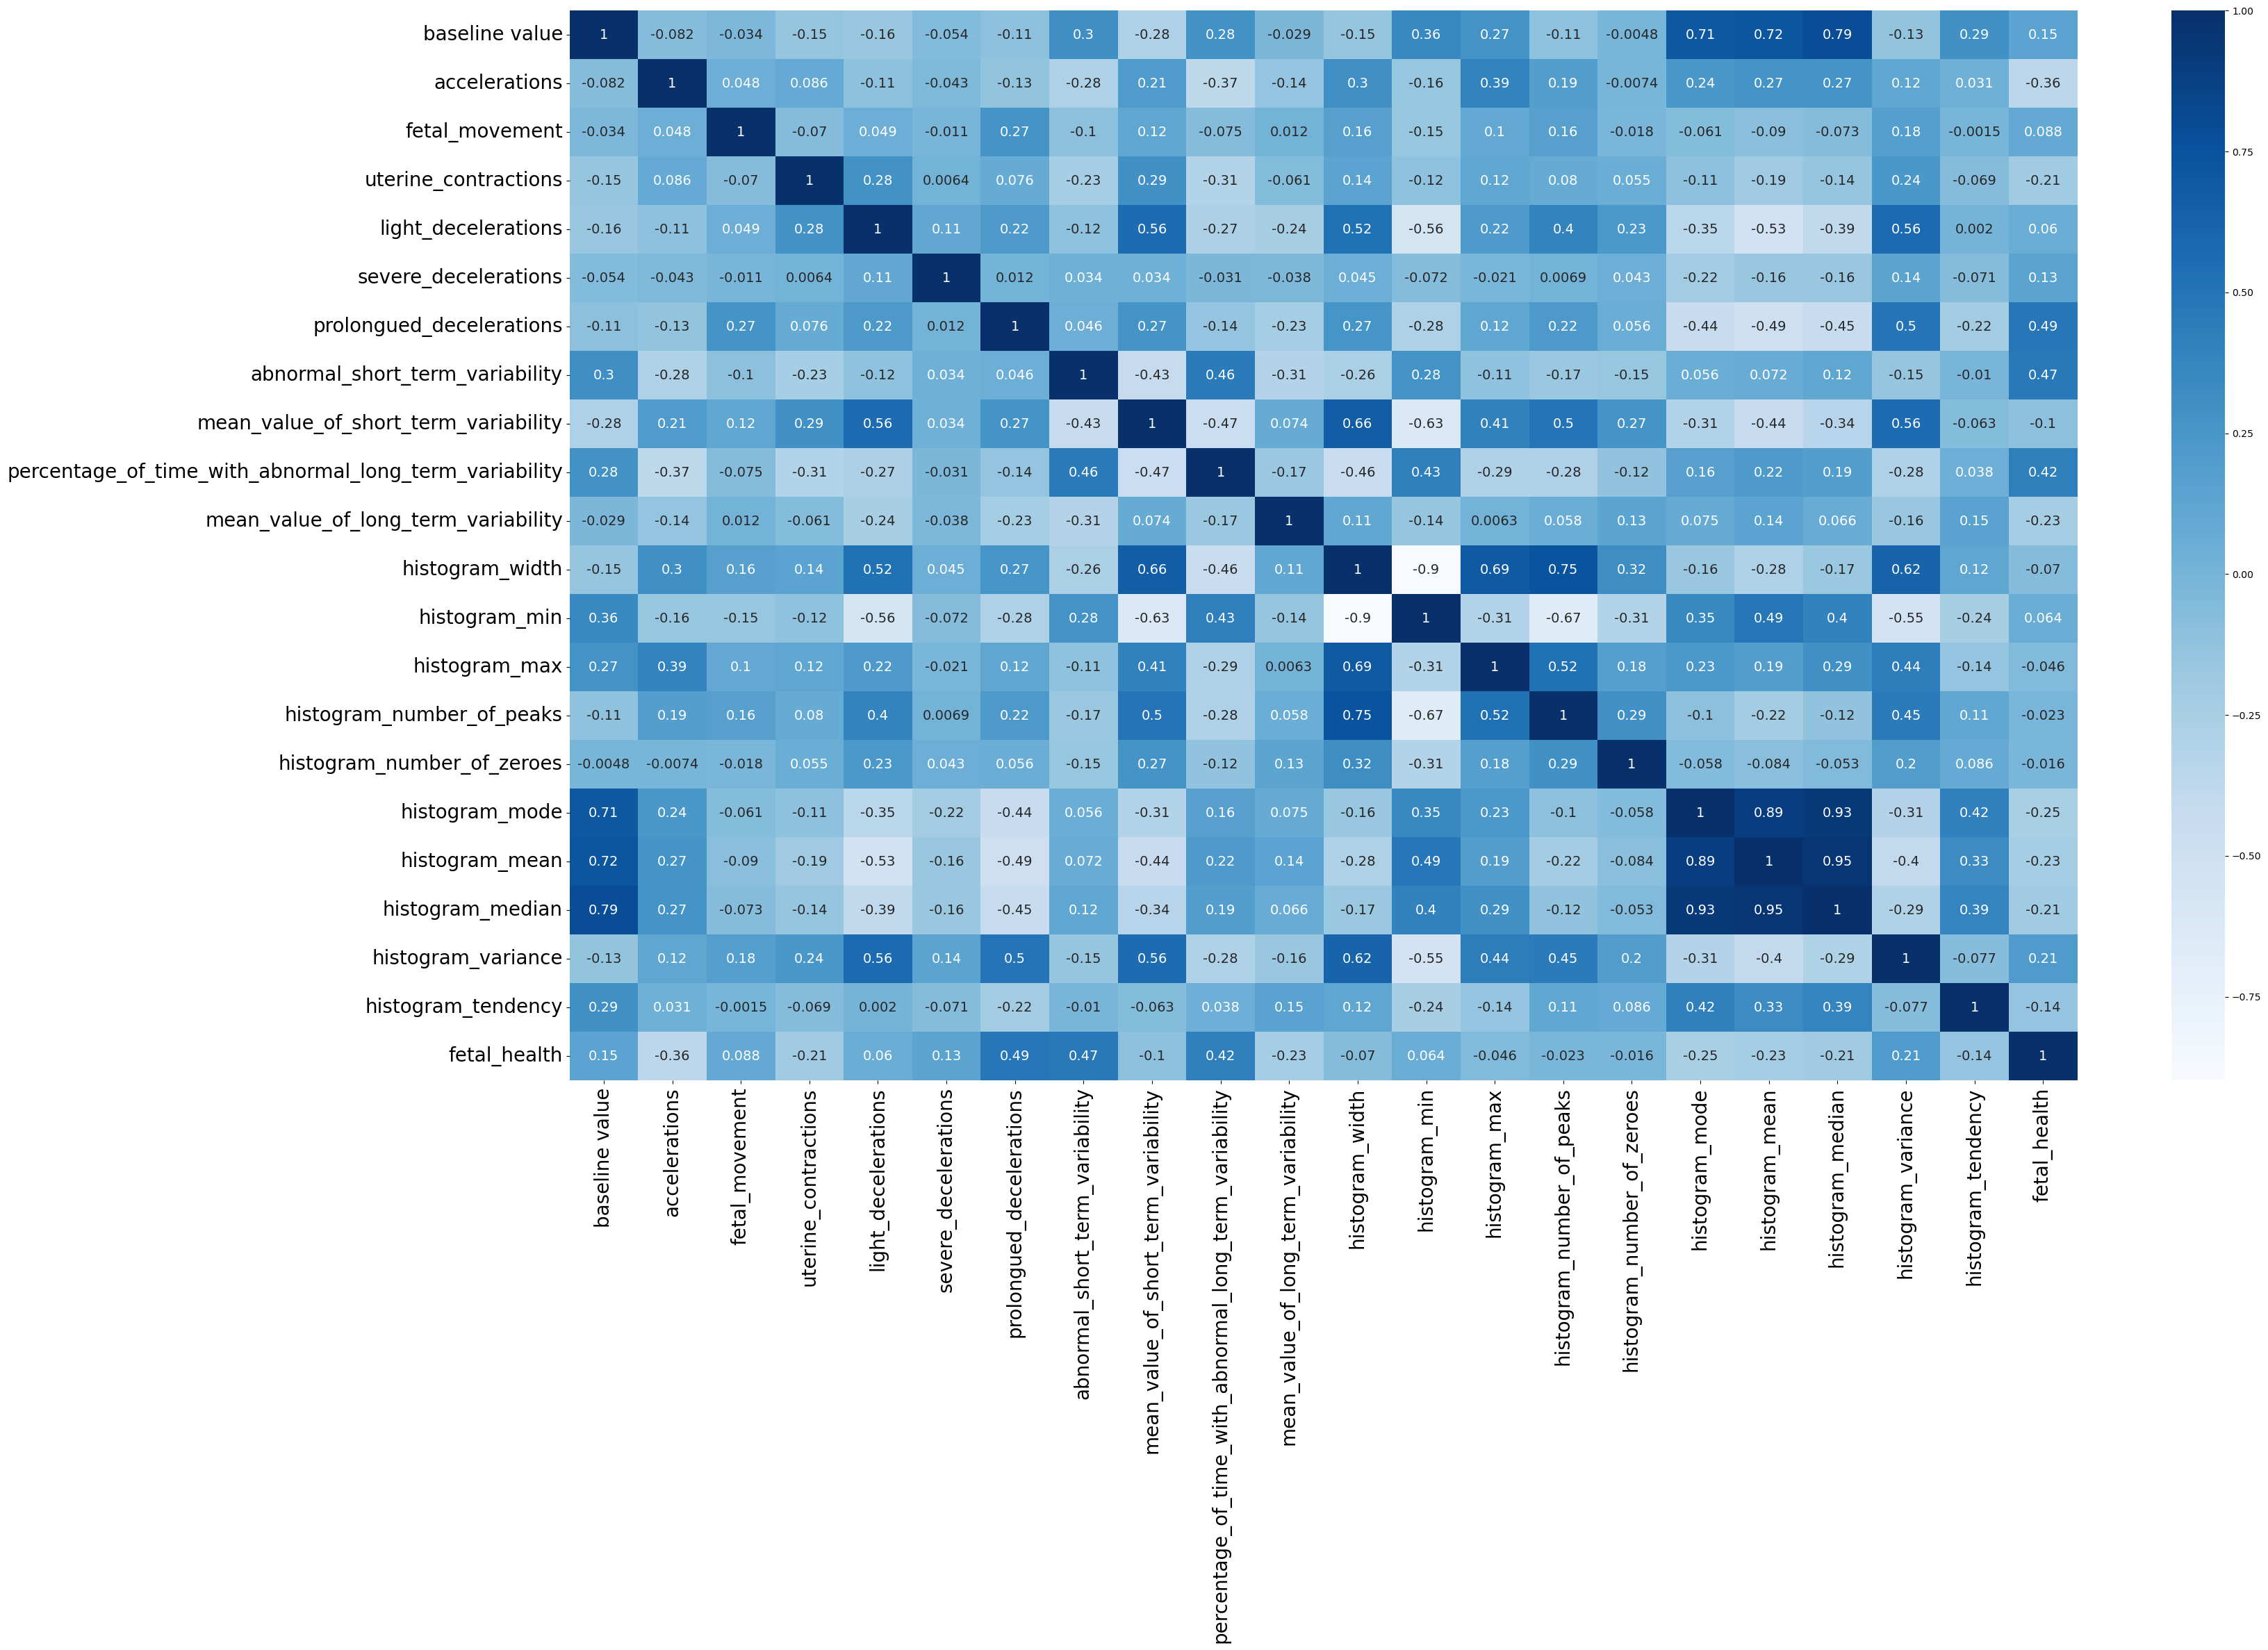

In [141]:
fig,ax=plt.subplots(figsize=(35,20))
sns.heatmap(data=df.corr(),annot=True,annot_kws={"size": 14},ax=ax,cmap='Blues')
plt.tick_params(axis = 'x', labelsize = 20)
plt.tick_params(axis = 'y', labelsize = 20)

In [142]:
df.groupby('fetal_health').mean()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
fetal_health,,,,,,,,,,,,,,,,,,,,,
1.0,131.998177,0.004002,0.008002,0.004801,0.001952,6.075334e-07,0.000052,42.501823,1.431713,5.059538,8.679891,73.492102,91.073512,164.565614,4.170109,0.337181,138.286756,135.116039,138.482382,17.556501,0.341434
2.0,141.650685,0.000277,0.008284,0.002404,0.000541,0.000000e+00,0.000096,61.791096,0.642123,28.832192,8.028425,49.250000,113.304795,162.554795,3.328767,0.246575,146.551370,144.746575,147.061644,7.277397,0.428082
3.0,131.668571,0.000394,0.025823,0.003806,0.003691,3.428571e-05,0.001280,64.554286,1.581714,22.571429,3.569714,78.240000,84.057143,162.297143,4.451429,0.348571,114.445714,112.811429,119.422857,51.017143,-0.080000


In [143]:
x=df.iloc[:,:-1].values
x

array([[1.20e+02, 0.00e+00, 0.00e+00, ..., 1.21e+02, 7.30e+01, 1.00e+00],
       [1.32e+02, 6.00e-03, 0.00e+00, ..., 1.40e+02, 1.20e+01, 0.00e+00],
       [1.33e+02, 3.00e-03, 0.00e+00, ..., 1.38e+02, 1.30e+01, 0.00e+00],
       ...,
       [1.40e+02, 1.00e-03, 0.00e+00, ..., 1.52e+02, 4.00e+00, 1.00e+00],
       [1.40e+02, 1.00e-03, 0.00e+00, ..., 1.51e+02, 4.00e+00, 1.00e+00],
       [1.42e+02, 2.00e-03, 2.00e-03, ..., 1.45e+02, 1.00e+00, 0.00e+00]])

In [144]:
y=df.iloc[:,-1].values
y

array([2., 1., 1., ..., 2., 2., 1.])

In [145]:
#converting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
x_train

array([[1.30e+02, 6.00e-03, 0.00e+00, ..., 1.37e+02, 4.00e+00, 0.00e+00],
       [1.22e+02, 0.00e+00, 0.00e+00, ..., 1.25e+02, 3.00e+00, 0.00e+00],
       [1.22e+02, 5.00e-03, 0.00e+00, ..., 1.26e+02, 4.00e+00, 0.00e+00],
       ...,
       [1.22e+02, 4.00e-03, 0.00e+00, ..., 1.27e+02, 2.60e+01, 1.00e+00],
       [1.38e+02, 2.00e-03, 0.00e+00, ..., 1.44e+02, 1.60e+01, 0.00e+00],
       [1.36e+02, 7.00e-03, 0.00e+00, ..., 1.44e+02, 3.00e+00, 0.00e+00]])

In [146]:
x_test

array([[1.44e+02, 2.00e-03, 1.00e-02, ..., 1.55e+02, 5.00e+00, 0.00e+00],
       [1.25e+02, 5.00e-03, 2.00e-03, ..., 1.20e+02, 3.40e+01, 0.00e+00],
       [1.20e+02, 1.30e-02, 6.00e-03, ..., 1.36e+02, 9.00e+00, 1.00e+00],
       ...,
       [1.44e+02, 0.00e+00, 3.00e-03, ..., 1.49e+02, 0.00e+00, 0.00e+00],
       [1.51e+02, 0.00e+00, 0.00e+00, ..., 1.57e+02, 5.60e+01, 1.00e+00],
       [1.40e+02, 6.00e-03, 3.00e-03, ..., 1.53e+02, 1.50e+01, 1.00e+00]])

In [147]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[-0.33919294,  0.72477418, -0.20254805, ..., -0.07850276,
        -0.51943215, -0.50480156],
       [-1.14571571, -0.81852909, -0.20254805, ..., -0.90596427,
        -0.55534005, -0.50480156],
       [-1.14571571,  0.46755697, -0.20254805, ..., -0.83700914,
        -0.51943215, -0.50480156],
       ...,
       [-1.14571571,  0.21033976, -0.20254805, ..., -0.76805402,
         0.27054156,  1.12639278],
       [ 0.46732984, -0.30409467, -0.20254805, ...,  0.40418312,
        -0.0885374 , -0.50480156],
       [ 0.26569914,  0.98199139, -0.20254805, ...,  0.40418312,
        -0.55534005, -0.50480156]])

In [148]:
x_test

array([[ 1.07222192, -0.30409467,  0.00723696, ...,  1.16268951,
        -0.48352426, -0.50480156],
       [-0.84326967,  0.46755697, -0.16059105, ..., -1.2507399 ,
         0.55780473, -0.50480156],
       [-1.3473464 ,  2.52529466, -0.07667704, ..., -0.14745788,
        -0.33989267,  1.12639278],
       ...,
       [ 1.07222192, -0.81852909, -0.13961255, ...,  0.74895875,
        -0.66306374, -0.50480156],
       [ 1.77792935, -0.81852909, -0.20254805, ...,  1.30059976,
         1.34777845,  1.12639278],
       [ 0.66896053,  0.72477418, -0.13961255, ...,  1.02477926,
        -0.12444529,  1.12639278]])

In [149]:
models=[KNeighborsClassifier(n_neighbors=7),GaussianNB(),SVC(),DecisionTreeClassifier(),LogisticRegression()]

for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    score=accuracy_score(y_test,y_pred)*100
    print("{}:{}".format(model,score),end='\n\n')

KNeighborsClassifier(n_neighbors=7):90.54373522458629

GaussianNB():73.5224586288416

SVC():93.61702127659575

DecisionTreeClassifier():93.3806146572104

LogisticRegression():91.48936170212765



The above score's clearly state that SVC and Decisiontree are highest scores among all the trained models. 

              precision    recall  f1-score   support

         1.0       0.94      0.98      0.96       341
         2.0       0.84      0.67      0.74        54
         3.0       1.00      0.89      0.94        28

    accuracy                           0.94       423
   macro avg       0.93      0.85      0.88       423
weighted avg       0.93      0.94      0.93       423



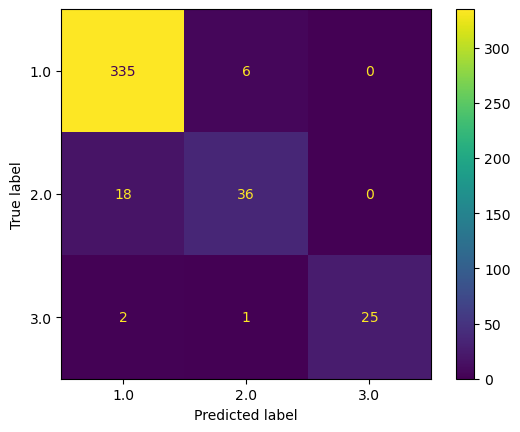

In [150]:
# SVC
model1=models[2] 
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
report=classification_report(y_test,y_pred1)
cmd=ConfusionMatrixDisplay.from_predictions(y_test,y_pred1)
print(report)
cmd

              precision    recall  f1-score   support

         1.0       0.95      0.96      0.96       341
         2.0       0.79      0.70      0.75        54
         3.0       0.87      0.96      0.92        28

    accuracy                           0.93       423
   macro avg       0.87      0.88      0.87       423
weighted avg       0.93      0.93      0.93       423



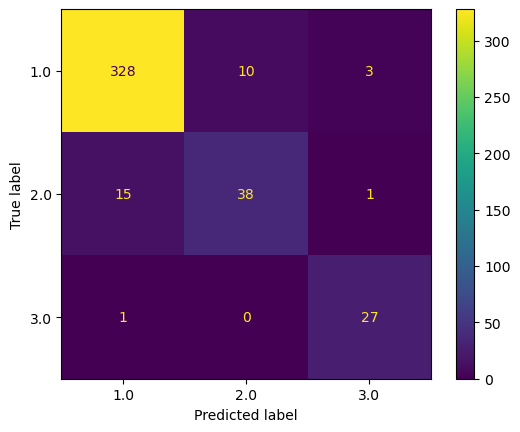

In [151]:
# Decisiontree
model2=models[3]
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
report=classification_report(y_test,y_pred2)
cmd=ConfusionMatrixDisplay.from_predictions(y_test,y_pred2)
print(report)
cmd